In [26]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
import importlib

In [81]:
importlib.reload(computer_science)
importlib.reload(util)

from util import get_studlist, load_vocab, load_rev_vocab, load_courselist, assign_unique_students
from util import get_tracks_deviation
from util import VOCAB_FILE, STUD_FILE, MATRIX_FILE, COURSE_FILE, STRM_FILE
import computer_science

In [11]:
vocab = load_vocab(VOCAB_FILE)
rev_vocab = load_rev_vocab(vocab)
studlist = pd.read_csv(STUD_FILE, index_col=False, header=None, squeeze=True)
X_CS = pd.read_csv(MATRIX_FILE, 
                header=None, 
                index_col=False, 
                dtype=np.float64)

In [14]:
STRM_MIN = 1090 # must start 2008-09 or later
STRM_MAX = 1190 # must not have classes in current school year 2018-2019

strm_df = pd.read_csv(STRM_FILE)
filtered_strm_df = strm_df.loc[(strm_df['strm_begin'] > STRM_MIN) & (strm_df['strm_end'] < STRM_MAX)]
matches = filtered_strm_df.index
X_CS = X_CS.loc[matches.intersection(X_CS.index)]

In [15]:
courselist = load_courselist(COURSE_FILE)
courselist_ix = [rev_vocab[c] for c in courselist]
X_CS = X_CS[(X_CS.iloc[:,courselist_ix] > 0).sum(axis=1) >= 10] # filter out people who didn't graduate,
                                                                # using heuristic of 10 CS courses

In [57]:
track_students = {}
for t in computer_science.TRACKNAMES:
    track_students[t] = get_studlist(X_CS, computer_science.TRACKS[t], t, rev_vocab)

CS205B not in rev_vocab
CS272 not in rev_vocab
ARTSTUDI160170 not in rev_vocab
ARTSTUDI160179 not in rev_vocab
CS244E not in rev_vocab
CS205B not in rev_vocab
CS272 not in rev_vocab
BIOMEDIN231 not in rev_vocab
BIOMEDIN231 not in rev_vocab
BIOMEDIN231 not in rev_vocab
BIO183 not in rev_vocab
CS205B not in rev_vocab
CS272 not in rev_vocab
CS205B not in rev_vocab
CS272 not in rev_vocab
CS244E not in rev_vocab
CS358 not in rev_vocab
CS358 not in rev_vocab
CS205B not in rev_vocab
CS272 not in rev_vocab
CS331 not in rev_vocab
CS331A not in rev_vocab
CS379 not in rev_vocab
CS331 not in rev_vocab
CS331A not in rev_vocab
CS379 not in rev_vocab
CS205B not in rev_vocab
CS272 not in rev_vocab
CS205B not in rev_vocab
CS272 not in rev_vocab
CS205B not in rev_vocab
CS272 not in rev_vocab


[18, 4, 45, 93, 224, 286, 179, 295, 155]


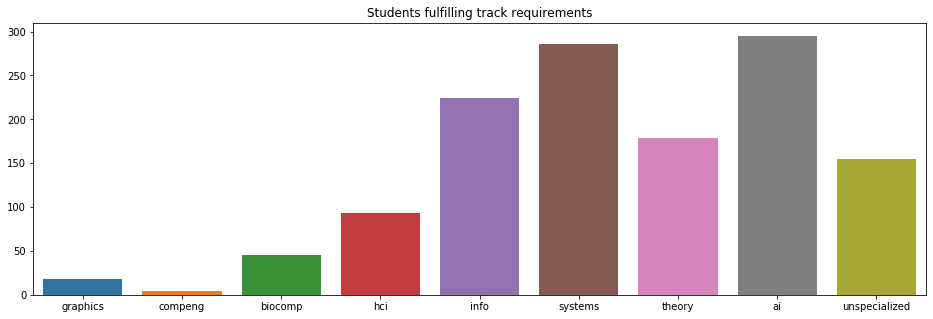

In [58]:
plt.figure(figsize = (16,5))
nums = [len(studs) for studs in list(track_students.values())]
sns.barplot(x=list(track_students.keys()), y=nums)
plt.title('Students fulfilling track requirements')
print(nums)

In [62]:
track_students_unique = assign_unique_students(
    computer_science.TRACKNAMES, 
    track_students, 
    computer_science.TRACK_PRIORITIES
)

[18, 4, 45, 93, 164, 231, 179, 253, 26]


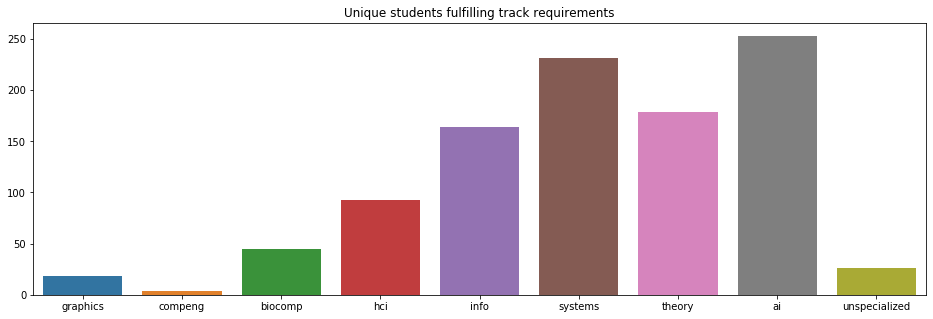

In [63]:
plt.figure(figsize = (16,5))
unique_nums = [len(studs) for studs in list(track_students_unique.values())]
g = sns.barplot(x=list(track_students_unique.keys()), y=unique_nums)
plt.title('Unique students fulfilling track requirements')
print(unique_nums)

In [65]:
# statistics
num_matches = sum(nums)
studs_match = len(set([s for studs in list(track_students.values()) for s in studs]))
studs_single_match = len(set([s for studs in list(track_students_unique.values()) for s in studs]))
print('matches made =', num_matches)
print('students matched =', studs_match)
print('total CS students =', X_CS.shape[0])
print('% students matched =', studs_match / X_CS.shape[0])
print('% students matched (exact) =', studs_single_match / X_CS.shape[0])
print('% students matched (dup) =', (studs_match-studs_single_match) / X_CS.shape[0])
print('% students not matched', 1 - studs_match / X_CS.shape[0])

matches made = 1299
students matched = 922
total CS students = 1728
% students matched = 0.5335648148148148
% students matched (exact) = 0.5335648148148148
% students matched (dup) = 0.0
% students not matched 0.46643518518518523


In [82]:
tracks_dev_df = X_CS.apply(
    get_tracks_deviation,
    args=(computer_science.TRACKNAMES, computer_science.TRACKS, rev_vocab),
    axis='columns'
)

tracks_dev_df.columns = computer_science.TRACKNAMES

Text(0.5, 1.0, "Sum of students' inverse distances from track fulfillment")

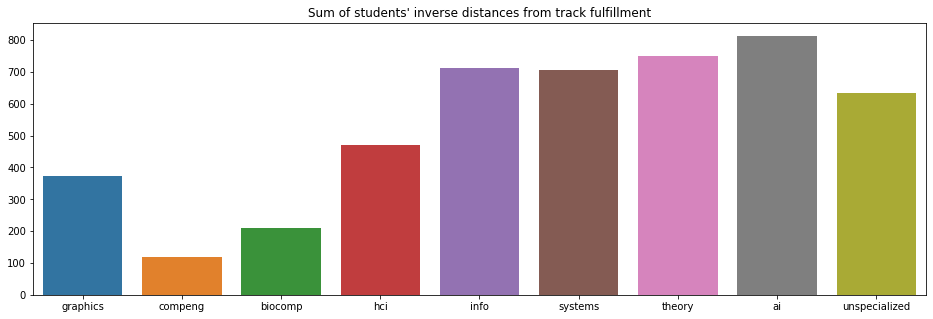

In [83]:
smoothed_tracks_dev_df = 1/(tracks_dev_df+1)
plt.figure(figsize = (16,5))
sns.barplot(x=smoothed_tracks_dev_df.columns, y=smoothed_tracks_dev_df.sum())
plt.title("Sum of students' inverse distances from track fulfillment")